<a href="https://colab.research.google.com/github/joelmanrique91-lgtm/geostats-colab-lab/blob/main/Mapa%20variografico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files
import ipywidgets as widgets
from IPython.display import display, clear_output

# --- Step 1: Upload CSV ---

print("Por favor, sube tu archivo CSV:")
uploaded = files.upload()

if not uploaded:
    print("No se subió ningún archivo.")
else:
    # Get the filename from the uploaded dictionary
    filename = next(iter(uploaded))
    print(f"Archivo subido: {filename}")

    # Read the CSV into a pandas DataFrame
    try:
        df = pd.read_csv(filename)
        print("Las primeras 5 filas de tu CSV son:")
        display(df.head())

        # --- Step 2: Interactive Column Mapping ---

        # Get column names for dropdowns
        column_names = ['Seleccionar columna'] + df.columns.tolist()

        print("\nAhora, selecciona las columnas correspondientes para X, Y, Z y Grade:")

        x_col_widget = widgets.Dropdown(
            options=column_names,
            value=column_names[0],
            description='Columna X:',
            disabled=False,
        )
        y_col_widget = widgets.Dropdown(
            options=column_names,
            value=column_names[0],
            description='Columna Y:',
            disabled=False,
        )
        z_col_widget = widgets.Dropdown(
            options=column_names,
            value=column_names[0],
            description='Columna Z:',
            disabled=False,
        )
        grade_col_widget = widgets.Dropdown(
            options=column_names,
            value=column_names[0],
            description='Columna Grade:',
            disabled=False,
        )

        output_widget = widgets.Output()

        def on_selection_change(change):
            with output_widget:
                clear_output()
                selected_x = x_col_widget.value
                selected_y = y_col_widget.value
                selected_z = z_col_widget.value
                selected_grade = grade_col_widget.value

                valid_selections = []
                if selected_x != 'Seleccionar columna':
                    valid_selections.append(f"X: {selected_x}")
                if selected_y != 'Seleccionar columna':
                    valid_selections.append(f"Y: {selected_y}")
                if selected_z != 'Seleccionar columna':
                    valid_selections.append(f"Z: {selected_z}")
                if selected_grade != 'Seleccionar columna':
                    valid_selections.append(f"Grade: {selected_grade}")

                if valid_selections:
                    print("Columnas seleccionadas:")
                    for sel in valid_selections:
                        print(f"- {sel}")

                    # Create a new DataFrame with selected columns
                    selected_df_cols = {}
                    if selected_x != 'Seleccionar columna':
                        selected_df_cols['X'] = df[selected_x]
                    if selected_y != 'Seleccionar columna':
                        selected_df_cols['Y'] = df[selected_y]
                    if selected_z != 'Seleccionar columna':
                        selected_df_cols['Z'] = df[selected_z]
                    if selected_grade != 'Seleccionar columna':
                        selected_df_cols['Grade'] = df[selected_grade]

                    if selected_df_cols:
                        global mapped_df
                        mapped_df = pd.DataFrame(selected_df_cols)
                        print("\nPrimeras 5 filas del DataFrame mapeado:")
                        display(mapped_df.head())
                    else:
                        print("Por favor, selecciona al menos una columna válida.")
                else:
                    print("Por favor, selecciona las columnas para X, Y, Z y Grade.")

        x_col_widget.observe(on_selection_change, names='value')
        y_col_widget.observe(on_selection_change, names='value')
        z_col_widget.observe(on_selection_change, names='value')
        grade_col_widget.observe(on_selection_change, names='value')

        display(x_col_widget, y_col_widget, z_col_widget, grade_col_widget, output_widget)

    except Exception as e:
        print(f"Error al leer el archivo CSV: {e}")

Por favor, sube tu archivo CSV:


Saving MagSus - MAG_SUS_10_3_SI Values.csv to MagSus - MAG_SUS_10_3_SI Values.csv
Archivo subido: MagSus - MAG_SUS_10_3_SI Values.csv
Las primeras 5 filas de tu CSV son:


,X,Y,Z,Hole ID,MAG_SUS_10_3_SI Values
0,2367290.57,6486627.475,3577.912,P105,4.78000
1,2367290.57,6486627.475,3575.912,P105,4.62325
2,2367290.57,6486627.475,3573.912,P105,4.52500
3,2367290.57,6486627.475,3571.912,P105,4.60625
4,2367290.57,6486627.475,3569.912,P105,4.37200



Ahora, selecciona las columnas correspondientes para X, Y, Z y Grade:


Dropdown(description='Columna X:', options=('Seleccionar columna', 'X', 'Y', 'Z', 'Hole ID', 'MAG_SUS_10_3_SI …

Dropdown(description='Columna Y:', options=('Seleccionar columna', 'X', 'Y', 'Z', 'Hole ID', 'MAG_SUS_10_3_SI …

Dropdown(description='Columna Z:', options=('Seleccionar columna', 'X', 'Y', 'Z', 'Hole ID', 'MAG_SUS_10_3_SI …

Dropdown(description='Columna Grade:', options=('Seleccionar columna', 'X', 'Y', 'Z', 'Hole ID', 'MAG_SUS_10_3…

Output()

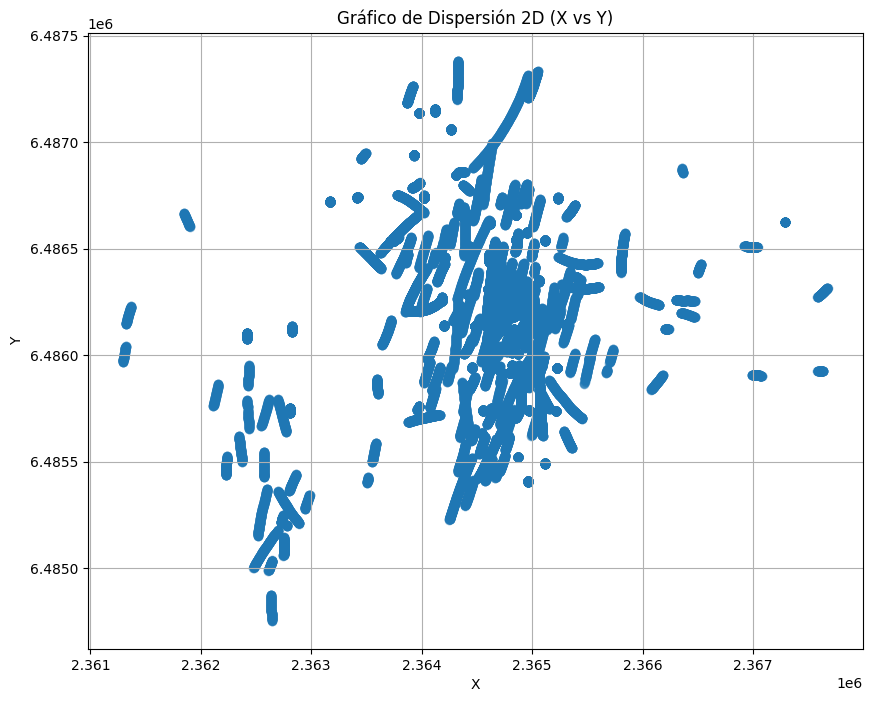

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(mapped_df['X'], mapped_df['Y'], alpha=0.5)
plt.title('Gráfico de Dispersión 2D (X vs Y)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

In [9]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform

# Datos sintéticos
np.random.seed(123)
n = 200
x = np.random.uniform(0, 1000, n)
y = np.random.uniform(0, 1000, n)
z = np.random.uniform(0, 50, n)

# Variable con anisotropía simulada
values = 0.005*x + 0.002*y + np.random.normal(0, 0.5, n)

coords = np.vstack((x,y)).T

# Cálculo de pares
dist_matrix = squareform(pdist(coords))
diff_matrix = squareform(pdist(values.reshape(-1,1)))

# Definir lag
lag = 50
max_range = 500

lags = np.arange(0, max_range, lag)
gamma = []

for h in lags:
    mask = (dist_matrix >= h) & (dist_matrix < h+lag)
    if np.sum(mask) > 0:
        gamma.append(0.5 * np.mean(diff_matrix[mask]**2))
    else:
        gamma.append(np.nan)

print(pd.DataFrame({"Lag":lags, "Gamma":gamma}))

   Lag     Gamma
0    0  0.140970
1   50  0.285061
2  100  0.348226
3  150  0.438458
4  200  0.547065
5  250  0.719691
6  300  0.894920
7  350  1.096969
8  400  1.332294
9  450  1.619751


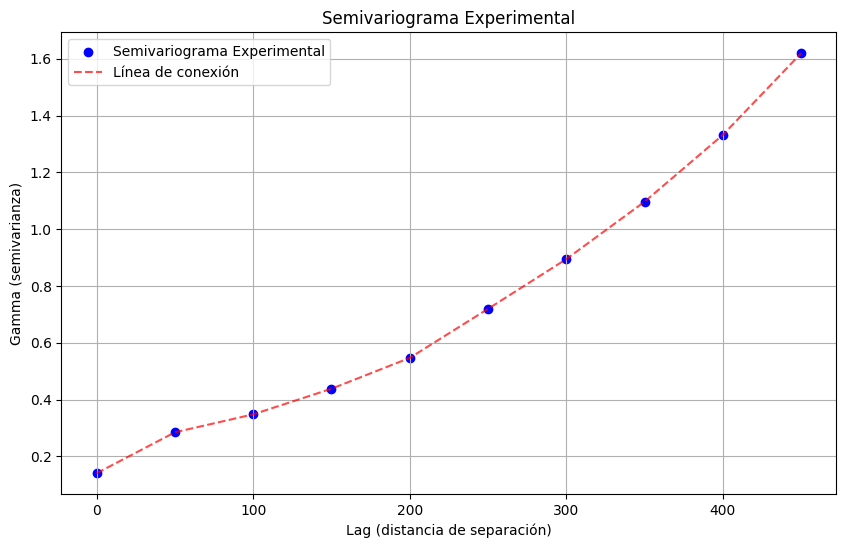

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(lags, gamma, color='blue', label='Semivariograma Experimental')
plt.plot(lags, gamma, color='red', linestyle='--', alpha=0.7, label='Línea de conexión')
plt.title('Semivariograma Experimental')
plt.xlabel('Lag (distancia de separación)')
plt.ylabel('Gamma (semivarianza)')
plt.grid(True)
plt.legend()
plt.show()

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
import ipywidgets as widgets
from IPython.display import display, clear_output

def run_semivariogram_analysis(lag_val, max_range_val, use_discrete_colormap, add_contours):
    clear_output(wait=True)
    print(f"Calculando semivariograma con Lag = {lag_val} y Max Range = {max_range_val}")

    # ==========================
    # 1. DATOS (ejemplo sintético anisotrópico)
    # ==========================
    np.random.seed(42)
    n = 250
    x = np.random.uniform(0, 1000, n)
    y = np.random.uniform(0, 1000, n)
    theta = np.deg2rad(45)
    x_rot = x*np.cos(theta) + y*np.sin(theta)
    values = 0.003*x_rot + np.random.normal(0, 0.3, n)
    coords = np.vstack((x, y)).T

    # ==========================
    # 2. CÁLCULO DE PARES
    # ==========================
    hx = []
    hy = []
    gamma = []

    for i in range(n):
        for j in range(i+1, n):
            dx = coords[j,0] - coords[i,0]
            dy = coords[j,1] - coords[i,1]
            g  = 0.5*(values[i] - values[j])**2

            hx.append(dx)
            hy.append(dy)
            gamma.append(g)

            # Simetría (-h)
            hx.append(-dx)
            hy.append(-dy)
            gamma.append(g)

    hx = np.array(hx)
    hy = np.array(hy)
    gamma = np.array(gamma)

    # ==========================
    # 3. DEFINICIÓN DE MALLA
    # ==========================
    grid_x = np.arange(-max_range_val, max_range_val + lag_val, lag_val)
    grid_y = np.arange(-max_range_val, max_range_val + lag_val, lag_val)

    gamma_map = np.zeros((len(grid_x), len(grid_y)))
    count_map = np.zeros_like(gamma_map)

    # ==========================
    # 4. ACUMULACIÓN DE PARES
    # ==========================
    for k in range(len(hx)):
        if abs(hx[k]) <= max_range_val and abs(hy[k]) <= max_range_val:
            ix = int((hx[k] + max_range_val) / lag_val)
            iy = int((hy[k] + max_range_val) / lag_val)

            if 0 <= ix < len(grid_x) and 0 <= iy < len(grid_y):
                gamma_map[ix, iy] += gamma[k]
                count_map[ix, iy] += 1

    min_pairs = 30
    mask = count_map >= min_pairs
    gamma_map[mask] = gamma_map[mask] / count_map[mask]
    gamma_map[~mask] = np.nan

    # ==========================
    # 5. VISUALIZACIÓN PROFESIONAL
    # ==========================
    plt.figure(figsize=(16, 7))

    # Plot gamma_map
    plt.subplot(1, 2, 1)

    # Determine colormap and contour options based on checkboxes
    cmap = 'viridis'
    levels = None

    if use_discrete_colormap:
        valid_gamma = gamma_map[~np.isnan(gamma_map)]
        if len(valid_gamma) > 0:
            levels = np.linspace(np.nanmin(gamma_map), np.nanmax(gamma_map), 10) # 10 discrete levels
            # Corrected: Use .resampled() for discretizing colormap
            cmap = plt.colormaps['viridis'].resampled(len(levels)-1)
        else:
            cmap = 'viridis'

    img = plt.imshow(gamma_map.T, origin='lower', extent=[grid_x.min(), grid_x.max(), grid_y.min(), grid_y.max()],
               cmap=cmap, vmin=0, vmax=np.nanmax(gamma_map))

    if add_contours:
        # Ensure there are valid gamma values for contours
        if np.nansum(gamma_map) > 0:
            plt.contour(grid_x, grid_y, gamma_map.T, levels=levels if levels is not None else 10, colors='k', linewidths=0.8)

    plt.colorbar(label='Semivarianza')
    plt.title(f'Mapa de Semivariograma Direccional (Lag={lag_val}, Rango={max_range_val})')
    plt.xlabel('h_x (distancia en X)')
    plt.ylabel('h_y (distancia en Y)')
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')

    # Plot count_map
    plt.subplot(1, 2, 2)
    plt.imshow(count_map.T, origin='lower', extent=[grid_x.min(), grid_x.max(), grid_y.min(), grid_y.max()],
               cmap='Blues', vmin=0, vmax=np.nanmax(count_map))
    plt.colorbar(label='Número de Pares')
    plt.title(f'Mapa de Conteo de Pares (Lag={lag_val}, Rango={max_range_val})')
    plt.xlabel('h_x (distancia en X)')
    plt.ylabel('h_y (distancia en Y)')
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')

    plt.tight_layout()
    plt.show()

# Create sliders
lag_slider = widgets.IntSlider(
    value=40,
    min=10,
    max=100,
    step=5,
    description='Lag:',
    continuous_update=False # Update plot only when slider is released
)

max_range_slider = widgets.IntSlider(
    value=300,
    min=100,
    max=800,
    step=50,
    description='Max Range:',
    continuous_update=False # Update plot only when slider is released
)

# Create checkboxes for visualization options
discrete_cmap_checkbox = widgets.Checkbox(
    value=False,
    description='Escala Discreta',
    disabled=False,
)

contours_checkbox = widgets.Checkbox(
    value=False,
    description='Curvas de Nivel',
    disabled=False,
)

# Group sliders and checkboxes into horizontal boxes for layout
controls_layout = widgets.VBox([
    widgets.HBox([lag_slider, max_range_slider]),
    widgets.HBox([discrete_cmap_checkbox, contours_checkbox])
])

# Display widgets and interactive output
interactive_plot = widgets.interactive(run_semivariogram_analysis,
                                       lag_val=lag_slider,
                                       max_range_val=max_range_slider,
                                       use_discrete_colormap=discrete_cmap_checkbox,
                                       add_contours=contours_checkbox)
display(controls_layout, interactive_plot.children[-1])

Output()